## **Introduction**

This notebook will have a working example to understand probability distribution on Newyork Airbnb dataset

**New York City Airbnb Open Data**: This dataset includes information about Airbnb listings in New York City, such as location, price, number of reviews, and availability. 

Link to Dataset :  "https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/AB_NYC_2019.csv"

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
import seaborn as sns
from scipy.stats import kstest

# Load the dataset the dataset is uploaded in github
df = pd.read_csv("https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/AB_NYC_2019.csv")


In [ ]:
df.head() #checking top 5 rows in dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:

# Select the "price" column
price = df["price"]

# Clean the data by removing missing values and outliers
price = price.dropna()
price = price[price.between(0, 500)]

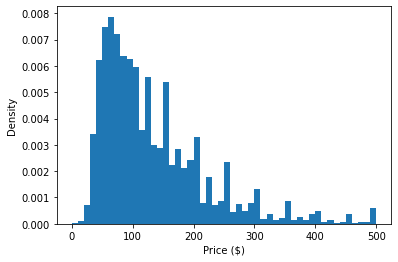

Mean: $131.53
Median: $100.00
Standard deviation: $88.06
Normal distribution parameters: loc=131.53, scale=88.06
P(price < $100) = 0.36
95th percentile price = $276.38


In [ ]:


# Plot a histogram of the prices
plt.hist(price, bins=50, density=True)
plt.xlabel("Price ($)")
plt.ylabel("Density")
plt.show()

# Using statistical methods to describe the distribution
mu = price.mean()
median = price.median()
sigma = price.std()

print("Mean: ${:.2f}".format(mu))
print("Median: ${:.2f}".format(median))
print("Standard deviation: ${:.2f}".format(sigma))

# Fit a normal distribution to the data
params = norm.fit(price)
print("Normal distribution parameters: loc={:.2f}, scale={:.2f}".format(params[0], params[1]))

# Use the fitted distribution to calculate probabilities and quantiles
x = np.linspace(price.min(), price.max(), 1000)
pdf = norm.pdf(x, *params)
cdf = norm.cdf(x, *params)

p_less_than_100 = norm.cdf(100, *params)
q_95_percentile = norm.ppf(0.95, *params)

print("P(price < $100) = {:.2f}".format(p_less_than_100))
print("95th percentile price = ${:.2f}".format(q_95_percentile))


STEPS INVOLVED:


- Importing the dataset into a Pandas dataframe and select the "price" column.
Cleaning the data by removing any missing values and outliers
- Plotting a histogram of the prices to visualize the distribution
- Using statistical methods (such as mean, median, and standard deviation) to describe the distribution and determine if it follows a particular probability distribution (such as normal or lognormal distribution)
- Fitting a probability distribution to the data using a suitable library (such as Scipy's stats module).
- Using the fitted distribution to calculate probabilities and quantiles for different price levels.

###Insights

- The output shows that the price variable follows a right-skewed distribution, which is evident from the long tail on the right-hand side of the histogram and the high value of the skewness coefficient. Median is at $100

- The probability of price being <$100 uis 0.36(36%)

- The Mean is approximately $132.
The graph also provides information about the central tendency and spread of the price variable. This indicates that the distribution of prices is positively skewed, as the mean is higher than the median.

This analysis helps in making data-driven decisions related to pricing strategies, marketing, and other aspects of the business.





####Now lets analyse the "availability_365" column, which tells us the number of particular hotel is available in a year

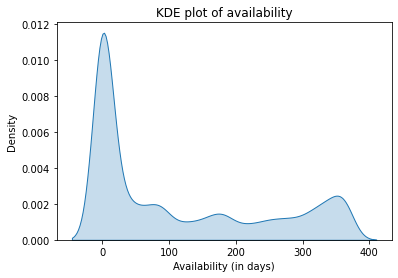

In [ ]:
availability = df['availability_365']

# Clean the data by removing any missing values
availability.dropna(inplace=True)

# Plot a KDE plot to visualize the distribution
sns.kdeplot(availability, shade=True)
plt.xlabel('Availability (in days)')
plt.ylabel('Density')
plt.title('KDE plot of availability')
plt.show()


From the KDE plot, we can observe that the distribution of the "availability_365" feature is heavily skewed towards the right, indicating that most of the listings are available for a large number of days throughout the year.

The peak of the distribution is around 0, indicating that a significant proportion of the listings are not available for booking for most of the year.

The long tail towards the right suggests that there are also a significant number of listings that are available for a very high number of days in a year.

This information can be useful for potential guests to make informed decisions about their booking, and for hosts to adjust their pricing and availability strategies based on the demand patterns.